# XGBoost template

## ====== Import dataset =========

In [1]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

## ======= Encoding categorical data =========

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
print ('The levels are', set(x[:, 1]))
print ('The levels are', set(x[:, 2]))
x[:, 1] = labelencoder_x.fit_transform(x[:, 1]) #3 levels
x[:, 2] = labelencoder_x.fit_transform(x[:, 2]) #only two levels
onehotencoder = OneHotEncoder(categorical_features = [1]) 
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:] #handling dummy variable trap

The levels are {'France', 'Spain', 'Germany'}
The levels are {'Male', 'Female'}


/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## ====== Splitting the dataset ===========

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## ======= Fitting XGBoost to the Training set ========

In [4]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## ======= Predict the training and test sets results ======

In [5]:
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

## ======== Making the confusion matrix =====

In [6]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print ('The accuracy for the training set is %f.\n'%(sum([cm_train[i][i] for i in range(cm_train.shape[0])])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%(sum([cm_test[i][i] for i in range(cm_test.shape[0])])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.871250.

The accuracy for the test set is 0.864500.



## ======== Applying the K-Fold cross validation ======

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print ('The averaged accuracy is %f, and\nstd is %f.\n'%(accuracies.mean(), accuracies.std()))

The averaged accuracy is 0.862999, and
std is 0.010678.



## ======== Applying Grid Search to find the best model and the best parameters ========

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [2, 3, 4], 'learning_rate': [0.02, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_log_loss',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('The best score:', best_accuracy)
print('The best parameters:', best_parameters)

The best score: -0.33385371055205176
The best parameters: {'max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 300}


## ======= Applying the best parameters found in the grid search =====

In [9]:
classifier = XGBClassifier(max_depth =3, learning_rate =0.05, n_estimators = 300)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## ======= Predicting the Training and Test sets results ====

In [10]:
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

## ======= Making the Confusion Matrix ===========

In [11]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print ('The accuracy for the training set is %f.\n'%(sum([cm_train[i][i] for i in range(cm_train.shape[0])])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%(sum([cm_test[i][i] for i in range(cm_test.shape[0])])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.874375.

The accuracy for the test set is 0.866500.



## ======== Applying the K-Fold cross validation ======

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print ('The averaged accuracy is %f, and\nstd is %f.\n'%(accuracies.mean(), accuracies.std()))

The averaged accuracy is 0.863126, and
std is 0.009199.



## ======= Visualizing? =========

### Use PCA or Kernel PCA to reduce dimension

## ========= Feature Scaling ========

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## ======= Applying Kernel PCA =======

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel = 'rbf') #set None to observe the variance, then set to 2 because we want to plot in 2d
x_train = kpca.fit_transform(x_train) #unsupervised learning
x_test = kpca.transform(x_test)

## ======== Applying Grid Search to find the best model and the best parameters ========

In [16]:
from sklearn.model_selection import GridSearchCV
classifier = XGBClassifier()
parameters = [{'max_depth': [2, 3, 4], 'learning_rate': [0.02, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_log_loss',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('The best score:', best_accuracy)
print('The best parameters:', best_parameters)

The best score: -0.46491793718194824
The best parameters: {'max_depth': 4, 'learning_rate': 0.05, 'n_estimators': 100}


## ====== Fitting the XGBoostClassifier with the best premaraters ===

In [18]:
classifier = XGBClassifier(mat_depth = 4, learning_rate = 0.05, n_estimators = 100)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, mat_depth=4,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## ======= Predicting the Training and Test sets results ====

In [19]:
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

## ======= Making the Confusion Matrix ===========

In [20]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print ('The accuracy for the training set is %f.\n'%(sum([cm_train[i][i] for i in range(cm_train.shape[0])])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%(sum([cm_test[i][i] for i in range(cm_test.shape[0])])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.796000.

The accuracy for the test set is 0.796500.



## ======= Visualising the Training set results ========

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

### =========== Find the prediction boundary ============

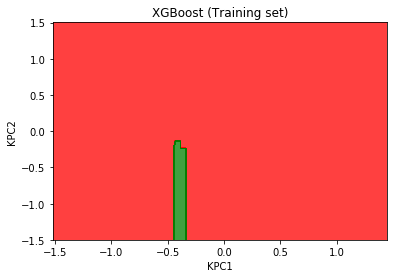

In [23]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                c = ListedColormap(('red'))(i), label = j)
plt.title('XGBoost (Training set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
#plt.legend()
plt.show()

### ========== Compare with the observations =========

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


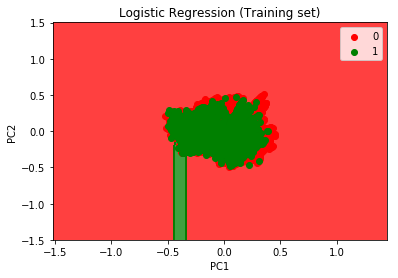

In [24]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## ============= Conclusion ============

### There are more than 2 features that determine the result, so we need to include more features to make the predictions